In [ ]:
"""
https://leetcode.com/problems/path-with-maximum-probability/


"""

## Dijkstra's Shortest Path Algorithm
Suppose there is graph having nodes, where each node represents a city. A few pair of nodes are connected to each other, with their distance mentioned on the conneting edge, as shown in the figure below:
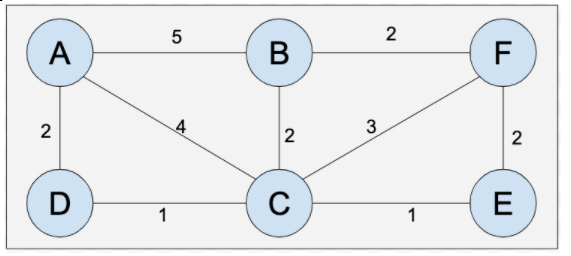


To find the shortest path from a given source to destination node in the example above, a Greedy approach would be - *At each current node, keep track of the nearest neighbour. We can determine the path in the reverse order once we have a table of nearest neighbours (optimal previous nodes).* For example, C is the optimal previous node for E. This way, the shortest path from `A` to `E` would be `A --> D --> C --> E`, as shown below:
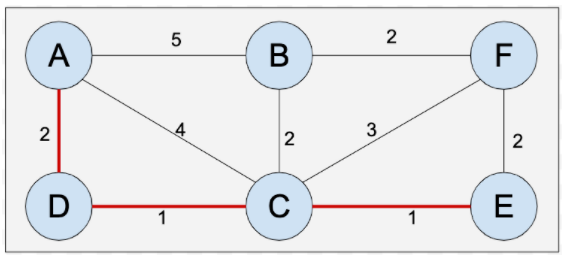

And, if we wish to print the distance of each node from `A`, then it would look like:
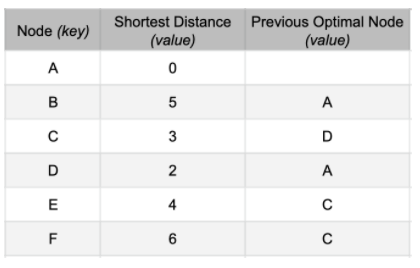<br>

Here, the **Previous Optimal Node** is the "best" node which could lead us to the current node. 


## The Problem
Using Dijkstra's algorithm, find the shortest path to all the nodes starting from a given single source node.  You need to print the distance of each node from the given source node. For the example quoted above, the distance of each node from `A` would be printed as:<br>
```
{'A': 0, 'D': 2, 'B': 5, 'E': 4, 'C': 3, 'F': 6}
```

## The Algorithm
1. Create a `result` dictionary. At the end of the program, `result` will have the shortest distance (value) for all nodes (key) in the graph. For our example, it will become as `{'A': 0, 'B': 5, 'C': 3, 'D': 2, 'F': 6, 'E': 4}`<br><br>
1. Start with the source node. Distance from source to source itself is 0.  <br><br>
1. The distance to all other nodes from the source is unknown initially, therefore set the initial distance to infinity.  <br><br>
1. Create a set `unvisited` containing nodes that have not been visited. Initially, it will have all nodes of the graph.<br><br>
1. Create a `path` dictionary that keeps track of the previous node (value) that can lead to the current node (key). At the end of the program, for our example, it will become as `{'B': 'A', 'C': 'D', 'D': 'A', 'F': 'C', 'E': 'C'}`. <br><br>
1. As long as `unvisited` is non-empty, repeat the following:
 - Find the unvisited node having smallest known distance from the source node.  <br><br>
 - For the current node, find all the **unvisited neighbours**. For this, you have calculate the distance of each unvisited neighbour.  <br><br>
 - If the calculated distance of the **unvisited neighbour** is less than the already known distance in `result` dictionary, update the shortest distance in the `result` dictionary. <br><br>
 - If there is an update in the `result` dictionary, you need to update the `path` dictionary as well for the same key. <br><br>
 - Remove the current node from the `unvisited` set.


**Note** - This implementation of the Dijkstra's algorithm is not very efficient. Currently it has a *O(n^2)* time complexity. We will see a better version in the next lesson - "Graph Algorithms" with *O(nlogn)* time complexity.

In [3]:
# Helper Code
from collections import defaultdict
class Graph:
    def __init__(self):
        self.nodes = set()                   # A set cannot contain duplicate nodes
        self.neighbours = defaultdict(list)  # Defaultdict is a child class of Dictionary that provides a default value for a key that does not exists.
        self.distances = {}                  # Dictionary. An example record as ('A', 'B'): 6 shows the distance between 'A' to 'B' is 6 units

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.neighbours[from_node].append(to_node)
        self.neighbours[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance    # lets make the graph undirected / bidirectional 
        
    def print_graph(self):
        print("Set of Nodes are: ", self.nodes)
        print("Neighbours are: ", self.neighbours)
        print("Distances are: ", self.distances)

### Exercise - Write the function definition here


##### Standard Answer
```python

import sys

'''Find the shortest path from the source node to every other node in the given graph'''
def dijkstra(graph, source):
    
    result = {}
    result[source] = 0                 
    
    for node in graph.nodes:
        if (node != source):
            result[node] = sys.maxsize
            
    unvisited = set(graph.nodes)  
    
    path = {}

    '''THE GREEDY APPROACH'''
    # As long as unvisited is non-empty
    while unvisited: 
        min_node = None    
        
        # 1. Find the unvisited node having smallest known distance from the source node.
        for node in unvisited:
            if node in result:
                
                if min_node is None:       
                    min_node = node
                elif result[node] < result[min_node]:
                    min_node = node

        if min_node is None:
            break
            
        # known distance of min_node
        current_distance = result[min_node]
        
        # 2. For the current node, find all the unvisited neighbours. 
        # For this, you have calculate the distance of each unvisited neighbour.
        for neighbour in graph.neighbours[min_node]:
            if neighbour in unvisited:
                distance = current_distance + graph.distances[(min_node, neighbour)]
            
                # 3. If the calculated distance of the unvisited neighbour is less than the already known distance in result dictionary, update the shortest distance in the result dictionary.
                if ((neighbour not in result) or (distance < result[neighbour])):
                    result[neighbour] = distance

                    # 4. If there is an update in the result dictionary, you need to update the path dictionary as well for the same key.
                    path[neighbour] = min_node
        
        # 5. Remove the current node from the unvisited set.
        unvisited.remove(min_node)

    return result
```


In [48]:
''' TO DO: Find the shortest path from the source node to every other node in the given graph '''
##### Your answer
from queue import Queue

def dijkstra(graph, source):
    # Declare and initialize result, unvisited, and path
    inf = 9999999
    result = {k:inf for k in graph.nodes}
    path = {}
    finished = set()
    
    cur = source
    result[cur] =0
    path[cur] = ''
    
    unvisited = Queue()
    unvisited.put(cur)
    while(not unvisited.empty()):
        cur = unvisited.get()
        current_batch = set()
        for node in graph.neighbours[cur]:
            #if not node in finished: ###### Really bad
            current_batch.add(node)
        finished.add(cur)
        
        for node in current_batch:
            new_distance = result[cur] + graph.distances[(cur,node)]
            if new_distance < result[node]:
                result[node] = new_distance
                path[node] = cur
                
            for next_node in graph.neighbours[node]:
                if not next_node in finished:
                    unvisited.put(next_node)
          
#     print(path)
    return result

### Test - Let's test your function

In [49]:
testGraph.nodes

{'A', 'B', 'C', 'D', 'E'}

In [50]:
dijkstra(testGraph, 'A')

{'E': 3, 'C': 4, 'D': 2, 'B': 3, 'A': 0}

In [51]:
# Test 1
testGraph = Graph()
for node in ['A', 'B', 'C', 'D', 'E']:
    testGraph.add_node(node)

testGraph.add_edge('A','B',3)
testGraph.add_edge('A','D',2)
testGraph.add_edge('B','D',4)
testGraph.add_edge('B','E',6)
testGraph.add_edge('B','C',1)
testGraph.add_edge('C','E',2)
testGraph.add_edge('E','D',1)

print(dijkstra(testGraph, 'A'))     # {'A': 0, 'D': 2, 'B': 3, 'E': 3, 'C': 4}

{'E': 3, 'C': 4, 'D': 2, 'B': 3, 'A': 0}


In [52]:
# Test 2
graph = Graph()
for node in ['A', 'B', 'C']:
    graph.add_node(node)
    
graph.add_edge('A', 'B', 5)
graph.add_edge('B', 'C', 5)
graph.add_edge('A', 'C', 10)

print(dijkstra(graph, 'A'))        # {'A': 0, 'C': 10, 'B': 5}

{'C': 10, 'B': 5, 'A': 0}


In [53]:
# Test 3
graph = Graph()
for node in ['A', 'B', 'C', 'D', 'E', 'F']:
    graph.add_node(node)
    
graph.add_edge('A', 'B', 5)
graph.add_edge('A', 'C', 4)
graph.add_edge('D', 'C', 1)
graph.add_edge('B', 'C', 2)
graph.add_edge('A', 'D', 2)
graph.add_edge('B', 'F', 2)
graph.add_edge('C', 'F', 3)
graph.add_edge('E', 'F', 2)
graph.add_edge('C', 'E', 1)

print(dijkstra(graph, 'A'))       # {'A': 0, 'C': 3, 'B': 5, 'E': 4, 'D': 2, 'F': 6}

{'E': 4, 'C': 3, 'D': 2, 'B': 5, 'A': 0, 'F': 6}
